In [7]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Import as Dataframe
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


时间序列的类型：
1. 长期变动
2. 季节变动
3. 周期变动
4. 随机变动

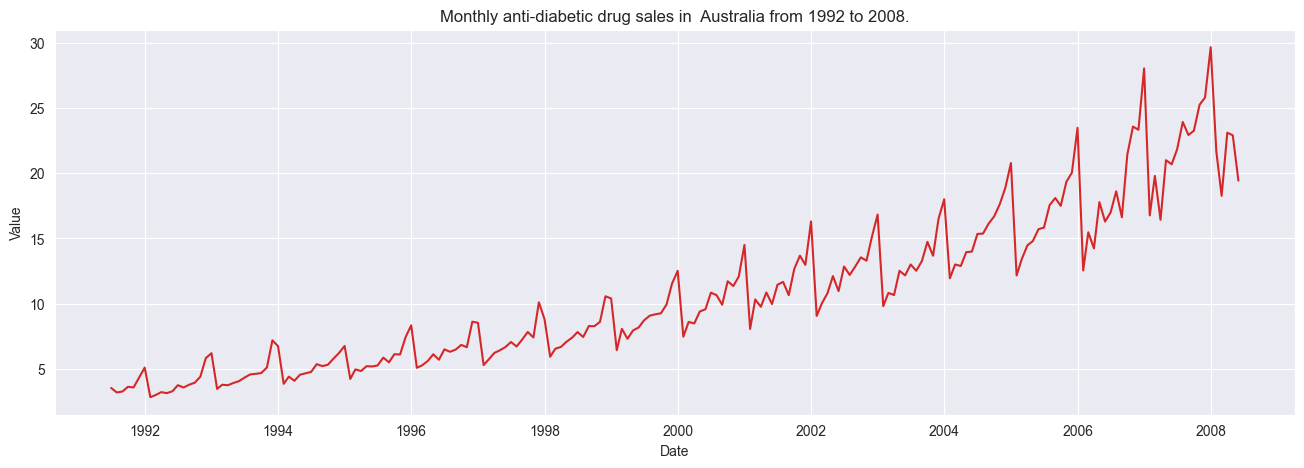

In [26]:
# Time series data source: fpp pacakge in R.
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in  Australia from 1992 to 2008.')

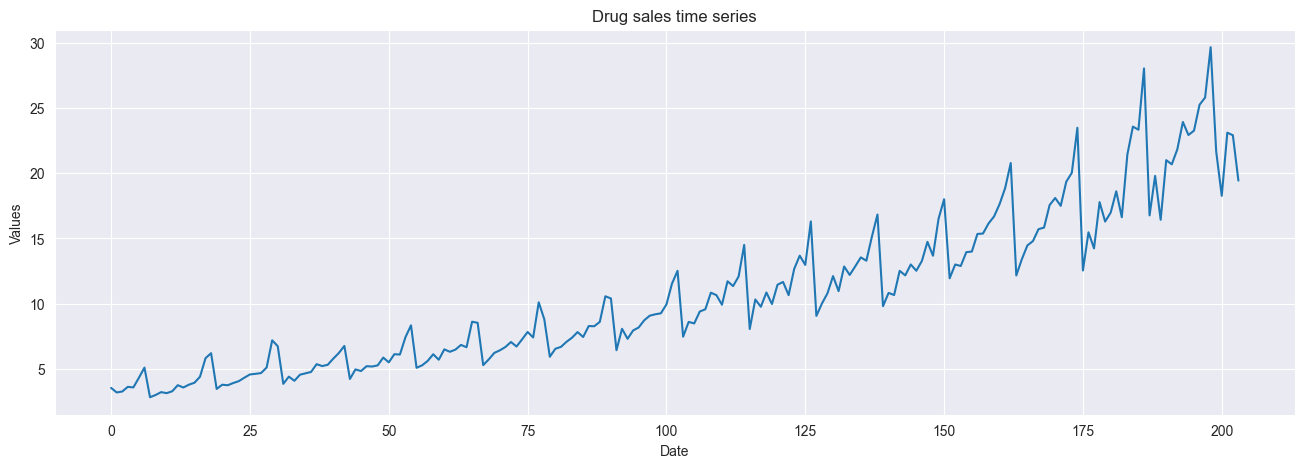

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True) # Convert index to column
# parse_dates 解析为日期格式
# index_col 设置索引列
# 绘制基本折线图
plt.figure(figsize=(16,5),dpi=100)
x = df.index
y = df['value'].values
plt.gca().set(xlabel='Date', ylabel='Values',title = 'Drug sales time series')

plt.plot(x,y)


<Axes: xlabel='months', ylabel='value'>

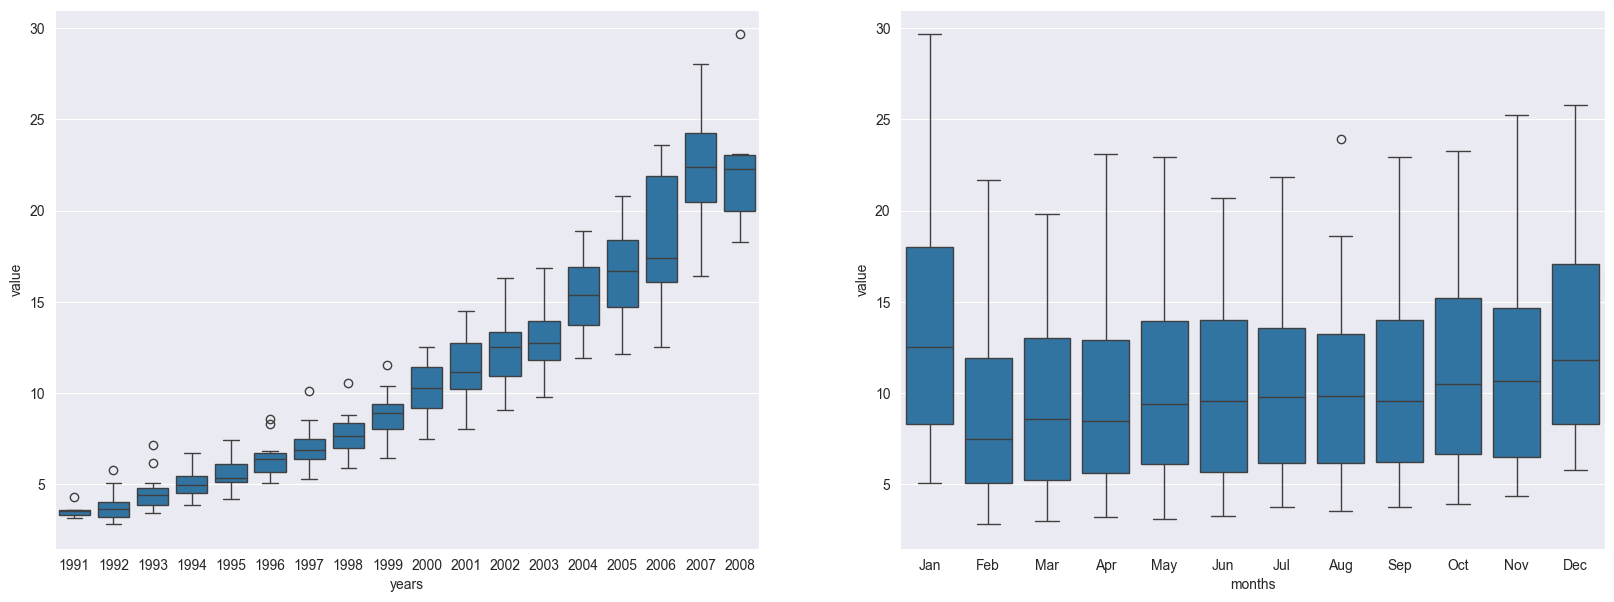

In [56]:
   # Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

df['years'] = [d.year for d in df.date]
df['months'] = [d.strftime('%b') for d in df.date]
years = df['years'].unique()
df
fig,axes = plt.subplots(1,2,figsize=(20,7),dpi=100)
sns.boxplot(x='years', y='value', data=df, ax=axes[0])
sns.boxplot(x='months', y='value',data=df.loc[~df['years'].isin([1991]),:]) # 排除1991和2008


In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse